<a href="https://colab.research.google.com/github/deepakkeshari127/Computational-Chemistry/blob/main/Computational_Chemistry_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import math


# **The Harmonic Oscillator Eigenstates**

---



In [5]:
def fac(n):
  return math.factorial(n)
def evenHn(x,n): #Compute the even Hermite polynomial
  n1 = int(n/2)
  sum = 0
  for l in range(0,n1+1):
    s_term = ((-1)**(n1-l))/(fac(2*l)*fac(n1-l))
    sum += s_term * (2*x)**(2*l)
    Hn = fac(n)*sum
  return Hn
def oddHn(x,n): #Compute the odd Hermite polynomial
  n1 = int((n-1)/2)
  sum = 0
  for l in range(0,n1+1):
    s_term = ((-1)**(n1-l))/((fac(2*l))*fac(n1-l))
    sum += s_term * (2*x)**(2*l+1)
    Hn = fac(n)*sum
  return Hn 

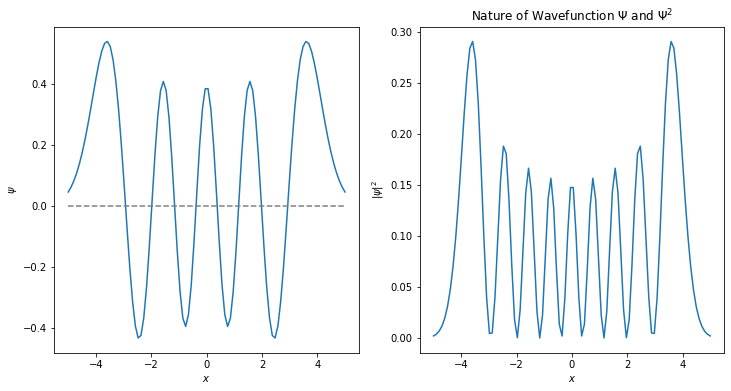

In [10]:
def gauss(Hn,x): #The gaussian function returns the product of Hermite polynomial and exponential function of x
  f = Hn*math.exp((-1*(x**2))/2)
  return f
# def simpson_rule(y,h):
# sum1=y[0]+y[-1]
# for i in range(1,len(y)-1):
# if i % 2 == 0:
# ai = 2
# else:
# ai = 4
# sum1 += ai * y[i]
# sum1 = sum1 * h/3
# return sum1

def N(n): #normalization constant
  '''Normalization constant '''
  return 1./np.sqrt(np.sqrt(np.pi)*2**n*fac(n))
def main(n): #Main Function Carrying out the Plot of psi Vs x and also probability density.
  x =np.linspace(-5,5,100)
  h = x[1]-x[0]
  f = []
  f2 = []
  for _ in x:
    if n%2==0: #Check for Odd or Even Hermite polynomial
      Hn = evenHn(_,n)
    else:
      Hn = oddHn(_,n)
    f1 = gauss(Hn,_)
    f.append(f1)
    f2.append(f1**2)
  No = N(n)
  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.plot(x,No*np.array(f))
  plt.plot([-5,5],[0,0], color='gray', linestyle='--')
  plt.xlabel("$x$")
  plt.ylabel("$ψ$")     
  plt.subplot(1,2,2)
  plt.plot(x,No**2*np.array(f2))
  plt.xlabel("$x$")
  plt.ylabel("$|ψ|^2$")
  plt.title("Nature of Wavefunction $Ψ$ and $Ψ^2 $")
n = 8
main(n)

# **The Classical Harmonic Oscillator**

---




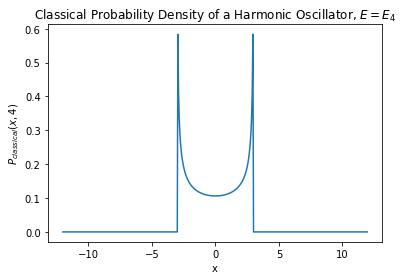

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import numpy.polynomial.hermite as Herm
#Choose simple units
m=1.
w=1.
hbar=1.
#Discretized space
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)

def classical_P(x,n):
  E = hbar*w*(n+0.5)
  x_max = numpy.sqrt(2*E/(m*w**2))
  classical_prob = numpy.zeros(x.shape[0])
  x_inside = abs(x) < (x_max - 0.025)
  classical_prob[x_inside] = 1./numpy.pi/numpy.sqrt(x_max**2-x[x_inside]*x[x_inside])
  return classical_prob
plt.figure()
plt.plot(x, classical_P(x,4))
plt.xlabel(r"x")
plt.ylabel(r"$P_{classical}(x,4)$")
plt.title(r"Classical Probability Density of a Harmonic Oscillator, $E=E_4$")
plt.show()

# **Comparision of the Classical and Quantum Harmonic Results**


---




In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
# import numpy.polynomial.hermite as hermite
from scipy.special import hermite
import math

In [18]:
#Choose simple units
m=1.
w=1.
hbar=1.
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)
def N(n):
  '''Normalization constant '''
  return 1./np.sqrt(np.sqrt(np.pi)*2**n*fac(n))
def psi(x, n ):
  """Harmonic oscillator wavefunction for level n for x"""
  Hr=hermite(n)
  ψx = N(n)*Hr(x)*np.exp(-0.5*x**2)
  return ψx

In [19]:
def classical_P(x,n):
  E = hbar*w*(n+0.5)
  x_max = numpy.sqrt(2*E/(m*w**2))
  classical_prob = numpy.zeros(x.shape[0])
  x_inside = abs(x) < (x_max - 0.025)
  classical_prob[x_inside] = 1./numpy.pi/numpy.sqrt(x_max**2-x[x_inside]*x[x_inside])
  return classical_prob

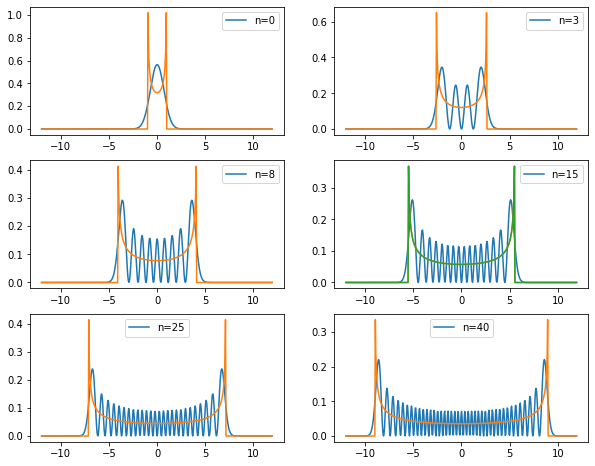

In [20]:
plt.figure(figsize=(10, 8))
plt.subplot(3,2,1)
plt.plot(x, numpy.conjugate(psi(x,0))*psi(x,0), label="n=0")
plt.plot(x, classical_P(x,0))
plt.legend()
plt.subplot(3,2,2)
plt.plot(x, numpy.conjugate(psi(x,3))*psi(x,3), label="n=3")
plt.plot(x, classical_P(x,3))
plt.legend()
plt.subplot(3,2,3)
plt.plot(x, numpy.conjugate(psi(x,8))*psi(x,8), label="n=8")
plt.plot(x, classical_P(x,8))
plt.legend()
plt.subplot(3,2,4)
plt.plot(x, numpy.conjugate(psi(x,15))*psi(x,15), label="n=15")
plt.plot(x,classical_P(x,15))
plt.plot(x, classical_P(x,15))
plt.legend()
plt.subplot(3,2,5)
plt.plot(x, numpy.conjugate(psi(x,25))*psi(x,25), label="n=25")
plt.plot(x, classical_P(x,25))
plt.legend()
plt.subplot(3,2,6)
plt.plot(x, numpy.conjugate(psi(x,40))*psi(x,40), label="n=40")
plt.plot(x, classical_P(x,40))
plt.legend()
plt.show()

# **Plot of Probability densities of harmonic oscillator**

---




In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import hermite
from math import factorial
def N(n):
  '''Normalization constant '''
  return 1./np.sqrt(np.sqrt(np.pi)*2**n*factorial(n))

def psi(n, x):
  """Harmonic oscillator wavefunction for level n computed on grid of points x"""
  Hr=hermite(n)
  ψx = N(n)*Hr(x)*np.exp(-0.5*x**2)
  return ψx
def E(n): #Eigen values
  '''Eigenvalues in units of h'''
  return (n + 0.5)
def V(x): #potential energy
  """Potential energy function"""
  return 0.5*x**2

In [23]:
'''
Installing celluloid module for animated plot of energy and eigen values.
'''
!pip install celluloid
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:


fig, bx = plt.subplots(figsize = (8,10))
camera = Camera(fig)
plt.close()
# fig, bx = plt.subplots(figsize=(10,10))
n_mbx = int(input("Enter the desired level: "))+1 #mbximum level as per desired
h = 6.626e-34 #J-s
ω = 4138.5 #cm-1
xmin, xmbx = -np.sqrt(2*E(n_mbx)), np.sqrt(2*E(n_mbx))
x = np.linspace(xmin, xmbx, 1000)
for i in range(n_mbx+1):
  for n in range(i):
    # plot potential V(x)
    bx.plot(x,V(x),color='black')
    # plot psi squared which we shift up by values of energy
    bx.plot(x,psi(n,x)**2 + E(n), lw=2)
    # add lines and labels
    bx.axhline(E(n), color='gray', linestyle='--',lw=1)
    bx.text(xmbx, 1.*E(n), f"n = {n}")
  Energy = h*ω*(2*i+1)
  print(f"Energy at eigen value {E(i)} is: {format( Energy, '.3g')} Joules")
  camera.snap()
bx.set_xlabel('x')
bx.set_ylabel('$\psi^2_n(x)$')
animation = camera.animate(interval=1000)
HTML(animation.to_html5_video())

Enter the desired level: 6
Energy at eigen value 0.5 is: 2.74e-30 Joules
Energy at eigen value 1.5 is: 8.23e-30 Joules
Energy at eigen value 2.5 is: 1.37e-29 Joules
Energy at eigen value 3.5 is: 1.92e-29 Joules
Energy at eigen value 4.5 is: 2.47e-29 Joules
Energy at eigen value 5.5 is: 3.02e-29 Joules
Energy at eigen value 6.5 is: 3.56e-29 Joules
Energy at eigen value 7.5 is: 4.11e-29 Joules
